In [1]:
import numpy as np
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='solarizedl', context='notebook', ticks=True, grid=False)
from pprint import pprint
import re
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import nltk
import seaborn as sns
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
base_merge = pd.read_csv('Actividad xenofobia.csv')
base_merge

,Date,Count
0,2020-04-01 02:00:00,1
1,2020-04-02 02:00:00,0
2,2020-04-03 02:00:00,1
3,2020-04-04 02:00:00,0
4,2020-04-05 01:00:00,0
...,...,...
361,2021-03-28 02:00:00,22
362,2021-03-29 02:00:00,9
363,2021-03-30 02:00:00,121
364,2021-03-31 02:00:00,15


In [3]:
base_merge.rename(columns={"Date": "Fecha", "Count": "Volumen"}, inplace = True)
base_merge['Fecha'] = pd.to_datetime(base_merge['Fecha'])
base_merge['Mes'] = base_merge['Fecha'].dt.strftime('%b %Y')
base_merge['Semana'] = base_merge['Fecha'].dt.dayofweek
base_merge["Fecha Semanal"] = base_merge["Semana"].astype(str) + base_merge["Mes"].astype(str)
base_merge

,Fecha,Volumen,Mes,Semana,Fecha Semanal
0,2020-04-01 02:00:00,1,Apr 2020,2,2Apr 2020
1,2020-04-02 02:00:00,0,Apr 2020,3,3Apr 2020
2,2020-04-03 02:00:00,1,Apr 2020,4,4Apr 2020
3,2020-04-04 02:00:00,0,Apr 2020,5,5Apr 2020
4,2020-04-05 01:00:00,0,Apr 2020,6,6Apr 2020
...,...,...,...,...,...
361,2021-03-28 02:00:00,22,Mar 2021,6,6Mar 2021
362,2021-03-29 02:00:00,9,Mar 2021,0,0Mar 2021
363,2021-03-30 02:00:00,121,Mar 2021,1,1Mar 2021
364,2021-03-31 02:00:00,15,Mar 2021,2,2Mar 2021


In [4]:
months = ["Apr 2020", "May 2020", "Jun 2020", 
          "Jul 2020", "Aug 2020", "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020", "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021" ]
diagramación = pd.DataFrame( base_merge[["Fecha", "Volumen", "Mes"]])
diagramación = pd.DataFrame(diagramación.groupby(diagramación['Mes'])['Volumen'].sum())
diagramación.reset_index(inplace=True)
diagramación['Mes'] = pd.Categorical(diagramación['Mes'], categories=months, ordered=True)
diagramación.sort_values(inplace=True, by="Mes")
diagramación.to_excel("Base_Diagramación_Honduras.xlsx")
diagramación.head()

,Mes,Volumen
0,Apr 2020,243
9,May 2020,520
7,Jun 2020,610
6,Jul 2020,523
2,Aug 2020,448


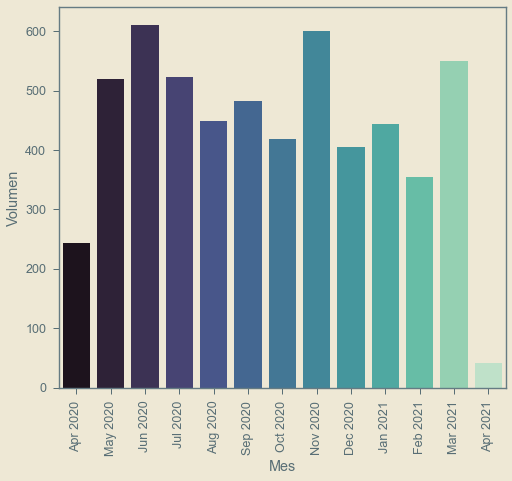

In [5]:
g = sns.barplot(x = 'Mes', y = 'Volumen', data = base_merge[['Mes', 'Volumen']], estimator=sum, ci=None, palette = "mako")
for item in g.get_xticklabels():
    item.set_rotation(90)

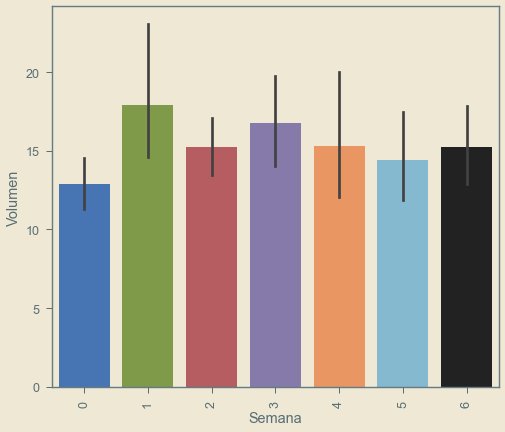

In [6]:
g = sns.barplot(x = 'Semana', y = 'Volumen', data = base_merge[['Semana', 'Volumen']])
for item in g.get_xticklabels():
    item.set_rotation(90)

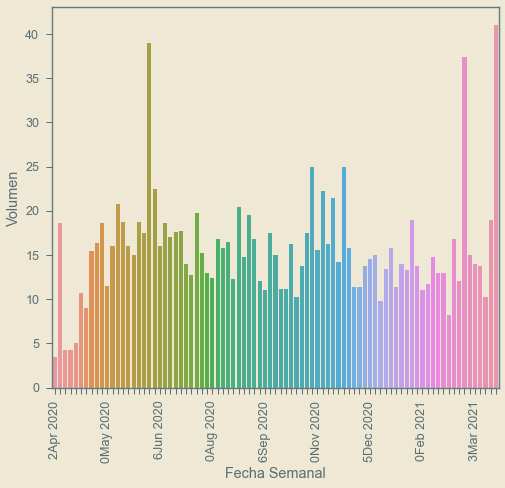

In [7]:
g = sns.barplot(x = 'Fecha Semanal', y = 'Volumen', data = base_merge[['Fecha Semanal', 'Volumen']], ci = None)
for item in g.get_xticklabels():
    item.set_rotation(90)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [8]:
path = r'C:\Users\JOSE\Desktop\OIM\Honduras\Topico_dominante_por_frase_snippet.xlsx'
base = pd.read_excel(path)

base['Text'] = base['Text'].str.lower()

base.head()

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0,0.8430,"no, tener, si, mierda, maje, decir, puta, hace...","pase, sin pena, esperándolas he estado!"
1,1,1,0,0.9099,"no, tener, si, mierda, maje, decir, puta, hace...",esa vieja ridícula trabaja a lo que su maldi...
2,2,2,0,0.7874,"no, tener, si, mierda, maje, decir, puta, hace...",maje que miedoooo😂😂😂😂
3,3,3,0,0.8972,"no, tener, si, mierda, maje, decir, puta, hace...",pues que los clubes mexicanos se vayan a la l...
4,4,4,0,0.6796,"no, tener, si, mierda, maje, decir, puta, hace...",bienvenidos https//t.co/wslwmkvtif


In [9]:
base['venezolano'] = base.Text.str.findall(r'(veneco|veneca|venezolan|cham)[A-Za-z]*')
base['venezolano'] = base.venezolano.map(lambda x: x!=[])
base['venezolano'] = np.where(base['venezolano'], 1, 0)

base['nicaraguenses'] = base.Text.str.findall(r'(nica|nicaraguense)[A-Za-z]*')
base['nicaraguenses'] = base.nicaraguenses.map(lambda x: x!=[])
base['nicaraguenses'] = np.where(base['nicaraguenses'], 1, 0)

base['salvadoreño'] = base.Text.str.findall(r'(guanaco|salvadoreño|guanaca|salvadoreña)[A-Za-z]*')
base['salvadoreño'] = base.salvadoreño.map(lambda x: x!=[])
base['salvadoreño'] = np.where(base['salvadoreño'], 1, 0)

base['guatemalteco'] = base.Text.str.findall(r'(chapin|chapín|chapina|guatemalteco|guatemalteca|guachipin)[A-Za-z]*')
base['guatemalteco'] = base.guatemalteco.map(lambda x: x!=[])
base['guatemalteco'] = np.where(base['guatemalteco'], 1, 0)

base['costarricense'] = base.Text.str.findall(r'(tic|costaric|costarricens)[A-Za-z]*')
base['costarricense'] = base.costarricense.map(lambda x: x!=[])
base['costarricense'] = np.where(base['costarricense'], 1, 0)

base['colombiano'] = base.Text.str.findall(r'(colombian|paisita|paisa)[A-Za-z]*')
base['colombiano'] = base.colombiano.map(lambda x: x!=[])
base['colombiano'] = np.where(base['colombiano'], 1, 0)

base['mexicano'] = base.Text.str.findall(r'(mexica|mexico)[A-Za-z]*')
base['mexicano'] = base.mexicano.map(lambda x: x!=[])
base['mexicano'] = np.where(base['mexicano'], 1, 0)

base['haitiano'] = base.Text.str.findall(r'(haiti|mesy|pity|mesie|mesi|piti)[A-Za-z]*')
base['haitiano'] = base.haitiano.map(lambda x: x!=[])
base['haitiano'] = np.where(base['haitiano'], 1, 0)

base['sd'] = np.where((base['guatemalteco']==0) & (base['venezolano']==0) & (base['nicaraguenses']==0) & (base['salvadoreño']==0) & (base['mexicano']==0) & (base['haitiano']==0) & (base['colombiano']==0) & (base['costarricense']==0), 1, 0)

base.head()

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,venezolano,nicaraguenses,salvadoreño,guatemalteco,costarricense,colombiano,mexicano,haitiano,sd
0,0,0,0,0.8430,"no, tener, si, mierda, maje, decir, puta, hace...","pase, sin pena, esperándolas he estado!",0,0,0,0,0,0,0,0,1
1,1,1,0,0.9099,"no, tener, si, mierda, maje, decir, puta, hace...",esa vieja ridícula trabaja a lo que su maldi...,0,0,0,0,0,0,0,0,1
2,2,2,0,0.7874,"no, tener, si, mierda, maje, decir, puta, hace...",maje que miedoooo😂😂😂😂,0,0,0,0,0,0,0,0,1
3,3,3,0,0.8972,"no, tener, si, mierda, maje, decir, puta, hace...",pues que los clubes mexicanos se vayan a la l...,0,0,0,0,0,0,1,0,0
4,4,4,0,0.6796,"no, tener, si, mierda, maje, decir, puta, hace...",bienvenidos https//t.co/wslwmkvtif,0,0,0,0,0,0,0,0,1


In [10]:
base = base.describe()[['venezolano', 'salvadoreño', 'guatemalteco', 'nicaraguenses','costarricense','colombiano','mexicano', 'haitiano', 'sd']].reset_index()
base = base.loc[base['index'] == 'mean']

base

,index,venezolano,salvadoreño,guatemalteco,nicaraguenses,costarricense,colombiano,mexicano,haitiano,sd
1,mean,0.340359,0.041198,0.012216,0.02012,0.076407,0.048144,0.104431,0.006467,0.40024


In [11]:
base = base.T.reset_index(drop=True)
base['Nacionalidad'] = ['Nacionalidad', 'Venezolanos', 'Salvadoreño', 'Guatemalteco', 'Nicaragüense', 'Costarricense','Colombiano','Mexicano', 'Haitiano', 'Migración general y \n \n otras nacionalidades']

base.columns = ['Volumen (%)', 'Nacionalidad']
base = base.iloc[1:,:]
base['Volumen (%)'] = base['Volumen (%)']*100

base

,Volumen (%),Nacionalidad
1,34.035928,Venezolanos
2,4.11976,Salvadoreño
3,1.221557,Guatemalteco
4,2.011976,Nicaragüense
5,7.640719,Costarricense
6,4.814371,Colombiano
7,10.443114,Mexicano
8,0.646707,Haitiano
9,40.023952,Migración general y \n \n otras nacionalidades


In [12]:
base.to_excel("Base_Nacionalidades_Honduras.xlsx")

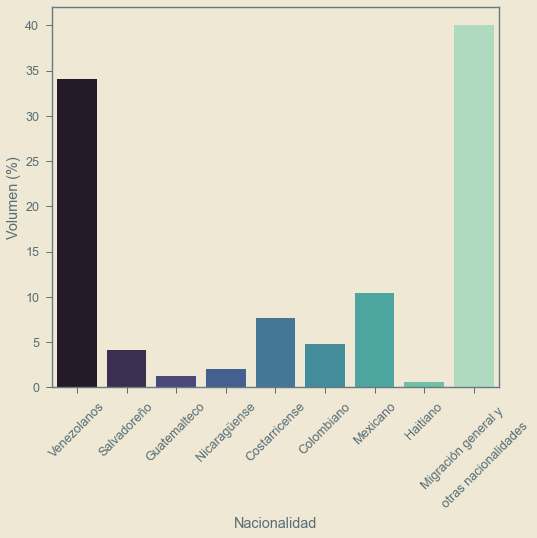

In [13]:
g = sns.barplot(x = 'Nacionalidad', y = 'Volumen (%)', data = base, palette = "mako")
for item in g.get_xticklabels():
    item.set_rotation(45)

In [ ]:
base[base['sd']==1]['Text']

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Venezolanos', 'Haitianos', 'Nicaragüenses', "Migración general y otras nacionalidades"
sizes = list(base.iloc[0, 1:])
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=270, colors = ['plum', 'yellowgreen', 'blue', 'sandybrown'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.savefig('/Users/diegoalejandrobermudezsierra/OneDrive - Universidad de los Andes/BX/OIM/Republica Dominicana/Nacionalidades.jpeg', bbox_inches='tight')

plt.show()